In [1]:
import pandas as pd
import re
import collections
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
main = pd.read_csv('lyrics (1).csv')
nltk.download('stopwords')
main1 = main.set_index("year", drop = False)
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rei_John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
first = main1[(main1.year>1958) & (main1.year<1970)]
second = main1[(main1.year>1969) & (main1.year<1980)]
third = main1[(main1.year>1979) & (main1.year<1990)]
fourth = main1[(main1.year>1989) & (main1.year<2000)]
fifth = main1[(main1.year>1999) & (main1.year<2010)]
sixth = main1[(main1.year>2009) & (main1.year<2020)]

In [4]:
type(fourth['lyrics'].iloc[0])

str

In [14]:
def clean(text):
    ### clean a lyric string
    # split string into lines
    if isinstance(text, str):
        #print(text)
        text = text.split('\n')
        # drop missing lines
        text = [i for i in text if i]
        # drop bracketed lines (e.g. producer info, song part indicators)
        text = [i for i in text if i[0]!='[']
        # join back into single string
        text = ' '.join(text)
        # filter out non-alpha-numeric characters 
        text = re.sub(r'[^\s\w]+', '', text)
        # strip capitalization
        text = text.lower()
        # drop stopwords
        text = ' '.join([i for i in text.split() if i not in stopwords])
    return text

In [4]:
first2 = first['lyrics'].map(clean)
second2 = second['lyrics'].map(clean)
third2 = third['lyrics'].map(clean)
fourth2 = fourth['lyrics'].map(clean)
fifth2 = fifth['lyrics'].map(clean)
sixth2 = sixth['lyrics'].map(clean)

In [5]:
first2

year
1959    1814 took little trip along colonel jackson mi...
1959    well north carolina way back hills old pappy s...
1959    well ive traveler life never took home never t...
1959    long ago poor heart broken said crazy heart se...
1959    heartache number one left never knew could hur...
                              ...                        
1969                                                  NaN
1969                                                  NaN
1969    one name heart one ill remain thats heartaches...
1969    delia oh delia long buddys talkin bout delia s...
1969                                                  NaN
Name: lyrics, Length: 447, dtype: object

In [15]:
from collections import Counter
words = re.findall(r'\w+', allwords(main1['lyrics']))
word_counts = Counter(words)
stoppies= [ a for a,b in list(word_counts.most_common(50))]
sw_set = set(stoppies)
sw_set -= {'aint', 'baby', 'day', 'girl', 'gonna', 'good', 'heart', 'life', 'love', 'man', 'night', 'old', 'shes', 'time'} 
sw_set

{'back',
 'cant',
 'cause',
 'come',
 'could',
 'dont',
 'every',
 'get',
 'go',
 'got',
 'ill',
 'im',
 'ive',
 'know',
 'let',
 'like',
 'little',
 'long',
 'make',
 'never',
 'oh',
 'one',
 'right',
 'said',
 'say',
 'see',
 'still',
 'take',
 'thats',
 'theres',
 'think',
 'way',
 'well',
 'would',
 'yeah',
 'youre'}

In [17]:
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(sw_set)
print(stopwords)
first2 = first['lyrics'].map(clean)
second2 = second['lyrics'].map(clean)
third2 = third['lyrics'].map(clean)
fourth2 = fourth['lyrics'].map(clean)
fifth2 = fifth['lyrics'].map(clean)
sixth2 = sixth['lyrics'].map(clean)

{'however', 'thats', 'seems', 'become', 'sometimes', 'once', 'those', 'must', 'otherwise', 'ever', 'latter', 'behind', 'seeming', 'third', 'thereafter', 'being', 'were', 'its', 'yeah', 'are', 'after', 'noone', 'anyhow', 'ten', 'have', 'more', 'upon', 'inc', 'side', 'others', 'let', 'front', 'said', 'every', 'theres', 'your', 'twenty', 'seemed', 'think', 'detail', 'none', 'anywhere', 'last', 'is', 'whence', 'with', 'ours', 'own', 'from', 'mine', 'done', 'the', 'enough', 'during', 'whether', 'describe', 'due', 'youre', 'both', 'you', 'amongst', 'him', 'now', 'full', 'etc', 'next', 'fill', 'what', 'another', 'can', 'keep', 'anyway', 'eleven', 'above', 'since', 'then', 'except', 'while', 'everything', 'as', 'nobody', 'whereas', 'here', 'his', 'though', 'same', 'themselves', 'off', 'up', 'too', 'wherever', 'all', 'onto', 'like', 'toward', 'such', 'myse"', 'cannot', 'of', 'something', 'top', 'under', 'name', 'do', 'no', 'de', 'out', 'sincere', 'how', 'several', 'still', 'without', 'although'

In [20]:
def allwords(corp):
    return " ".join(corp[corp.notnull()].values)
allfirst = allwords(first2)
allsecond = allwords(second2)
allthird = allwords(third2)
allfourth = allwords(fourth2)
allfifth = allwords(fifth2)
allsixth = allwords(sixth2)

In [25]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(sw_set)
print(stopwords)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.

# To eliminate duplicates, remember to split by punctuation, and use case demiliters
def commonWords(x):
    wordcount = {}
    i = 0
    for word in (x.split(" ")):
        #pint(word)
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
        i += 1
    return wordcount
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(commonWords(allfirst))
word_counter2 = collections.Counter(commonWords(allsecond))
word_counter3= collections.Counter(commonWords(allthird))
word_counter4 = collections.Counter(commonWords(allfourth))
word_counter5 = collections.Counter(commonWords(allfifth))
word_counter6 = collections.Counter(commonWords(allsixth))
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Create a data frame of the most common words 
# Draw a bar chart
nineteen60 = word_counter.most_common(n_print)
nineteen70 = word_counter2.most_common(n_print)
nineteen80 = word_counter3.most_common(n_print)
nineteen90 = word_counter4.most_common(n_print)
two00 = word_counter5.most_common(n_print)
two10 = word_counter6.most_common(n_print)
print(nineteen60)

{'however', 'thats', 'seems', 'become', 'sometimes', 'once', 'those', 'must', 'otherwise', 'ever', 'latter', 'behind', 'seeming', 'third', 'thereafter', 'being', 'were', 'its', 'yeah', 'are', 'after', 'noone', 'anyhow', 'ten', 'have', 'more', 'upon', 'inc', 'side', 'others', 'let', 'front', 'said', 'every', 'theres', 'your', 'twenty', 'seemed', 'think', 'detail', 'none', 'anywhere', 'last', 'is', 'whence', 'with', 'ours', 'own', 'from', 'mine', 'done', 'the', 'enough', 'during', 'whether', 'describe', 'due', 'youre', 'both', 'you', 'amongst', 'him', 'now', 'full', 'etc', 'next', 'fill', 'what', 'another', 'can', 'keep', 'anyway', 'eleven', 'above', 'since', 'then', 'except', 'while', 'everything', 'as', 'nobody', 'whereas', 'here', 'his', 'though', 'same', 'themselves', 'off', 'up', 'too', 'wherever', 'all', 'onto', 'like', 'toward', 'such', 'myse"', 'cannot', 'of', 'something', 'top', 'under', 'name', 'do', 'no', 'de', 'out', 'sincere', 'how', 'several', 'still', 'without', 'although'

         Word  Count
60s 0    love    543
    1    time    251
    2   gonna    191
    3     man    190
    4   heart    173
    5     old    162
    6   going    142
    7   world    141
    8    away    136
    9     big    131
70s 0    love    737
    1    time    329
    2     man    232
    3    good    201
    4     day    172
    5   night    169
    6    life    166
    7  things    149
    8   gonna    140
    9   world    139
80s 0    love   1099
    1    time    360
    2   heart    318
    3    baby    261
    4     old    243
    5   gonna    237
    6   night    207
    7    shes    196
    8    aint    191
    9    good    180
90s 0    love    962
    1   heart    444
    2    time    409
    3    aint    355
    4   gonna    325
    5    baby    306
    6    shes    305
    7   night    295
    8     man    270
    9    good    265
00s 0    love    758
    1    time    478
    2    aint    478
    3    baby    422
    4     day    328
    5    good    320
    6    life

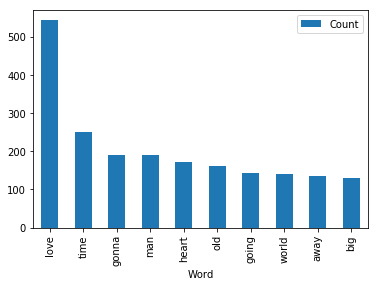

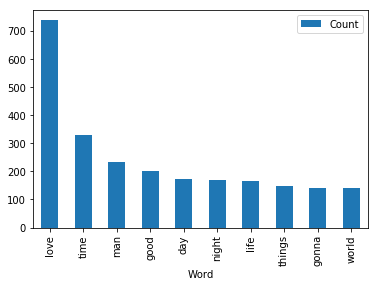

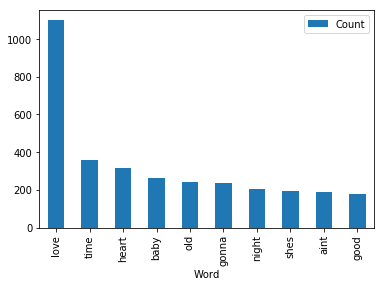

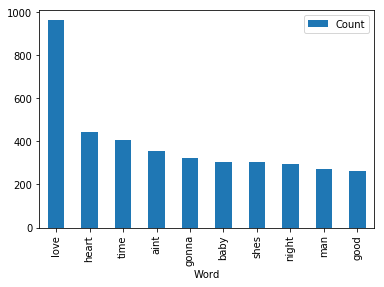

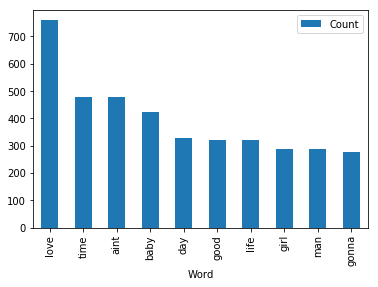

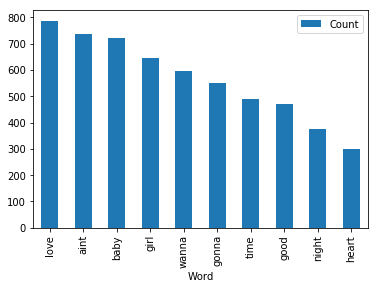

In [28]:
nineteen60 = word_counter.most_common(n_print)
nineteen70 = word_counter2.most_common(n_print)
nineteen80 = word_counter3.most_common(n_print)
nineteen90 = word_counter4.most_common(n_print)
two00 = word_counter5.most_common(n_print)
two10 = word_counter6.most_common(n_print)

df = pd.DataFrame(nineteen60, columns = ['Word', 'Count'])
#print(df)
df.plot.bar(x='Word',y='Count')
sf = pd.DataFrame(nineteen70, columns = ['Word', 'Count'])
#print(sf)
sf.plot.bar(x='Word',y='Count')
tf = pd.DataFrame(nineteen80, columns = ['Word', 'Count'])
#print(tf)
tf.plot.bar(x='Word',y='Count')
ff = pd.DataFrame(nineteen90, columns = ['Word', 'Count'])
#print(ff)
ff.plot.bar(x='Word',y='Count')
of = pd.DataFrame(two00, columns = ['Word', 'Count'])
#print(of)
of.plot.bar(x='Word',y='Count')
xf = pd.DataFrame(two10, columns = ['Word', 'Count'])
#print(xf)
xf.plot.bar(x='Word',y='Count')

frames = [df, sf, tf, ff, of, xf]
final = pd.concat(frames, keys = ['60s', '70s', '80s', '90s', '00s', '10s'])
print(final)
